# Numerical Computing - Numpy Arrays

**Author**: [Gabriele Pompa](https://www.linkedin.com/in/gabrielepompa/): gabriele.pompa@unisi.com

# Table of contents

[Executive Summary](#summary)
1. [Introduction: from Lists to Arrays](#intro)\
    1.1. [`numpy.ndarray` $\mu \epsilon \tau \alpha$-informations](#meta_info)
2. [1-dim arrays](#1_dim)\
    2.1. [Array Creation](#creation_1d)\
&nbsp; &nbsp; &nbsp; &nbsp; 2.1.1. [From Lists or Tuples](#from_lists_1d)\
&nbsp; &nbsp; &nbsp; &nbsp; 2.1.2. [From sequences of numbers: `np.arange()`](#arange_linspace)\
&nbsp; &nbsp; &nbsp; &nbsp; 2.1.3. [Using placeholder content: `np.zeros()`, `np.ones()`, `np.empty()`](#arange_linspace_1d)\
2.2. [Indexing, Slicing, Assigning and Iterating](#index_slice_iter_1d)\
&nbsp; &nbsp; &nbsp; &nbsp; 2.2.1. [Indexing](#ind_1d)\
&nbsp; &nbsp; &nbsp; &nbsp; 2.2.2. [Slicing](#slice_1d)\
&nbsp; &nbsp; &nbsp; &nbsp; 2.2.3. [Assigning new values](#assign_1d)\
&nbsp; &nbsp; &nbsp; &nbsp; 2.2.4. [Iterating over arrays](#iter_1d)\
    2.3. [Basic operations (are _element-wise_ )](#indexing_slicing_iterating)\
&nbsp; &nbsp; &nbsp; &nbsp; 2.3.1. [_Focus on:_ `*` operator on lists](#*elementwise)\
&nbsp; &nbsp; &nbsp; &nbsp; 2.3.2. [Built-in methods: `.min()`, `.max()`, `.sum()` and more](#built_in_methods_1d)\
&nbsp; &nbsp; &nbsp; &nbsp; 2.3.3. [Universal functions](#univ_func_1d)
3. [N-dim arrays](#N_dim)\
    3.1. [Array Creation](#creation_ndim)\
&nbsp; &nbsp; &nbsp; &nbsp; 3.1.1. [From Lists or Tuples](#from_lists_ndim)\
&nbsp; &nbsp; &nbsp; &nbsp; 3.1.2. [_Focus on:_ printing arrays](#print_array_ndim)\
&nbsp; &nbsp; &nbsp; &nbsp; 3.1.1. [Using placeholder content: role of the `shape` parameter](#arange_linspace_ndim)\
    3.2. [Indexing, Slicing, Assigning and Iterating](#indexing_slicing_iterating_ndim)\
&nbsp; &nbsp; &nbsp; &nbsp; 3.2.1. [Indexing](#ind_nd)\
&nbsp; &nbsp; &nbsp; &nbsp; 3.2.2. [Slicing](#slice_nd)\
&nbsp; &nbsp; &nbsp; &nbsp; 3.2.3. [Assigning new values](#assign_nd)\
&nbsp; &nbsp; &nbsp; &nbsp; 3.2.4. [Iterating over N-dim arrays](#iter_nd)\
    3.3. [Basic operations (are _element-wise_ )](#basic_op_nd)\
&nbsp; &nbsp; &nbsp; &nbsp; 3.3.1. [_Focus on:_ Matrix Operations](#matrix_operations_nd)\
&nbsp; &nbsp; &nbsp; &nbsp; 3.3.2. [Built-in methods: role of the `axis` parameter](#built_in_methods_nd)\
&nbsp; &nbsp; &nbsp; &nbsp; 3.3.3. [Universal functions](#univ_func_nd)\
    3.4. [Shape Manipulation](#shape_manipulation)\
&nbsp; &nbsp; &nbsp; &nbsp; 3.4.1. [Changing the shape: `.reshape()`](#reshape)\
&nbsp; &nbsp; &nbsp; &nbsp; 3.4.2. [_Focus on:_ Matrix Transpose `.T`](#mat_T)\
&nbsp; &nbsp; &nbsp; &nbsp; 3.4.3. [Changing the size: `.resize()`](#resize)\
&nbsp; &nbsp; &nbsp; &nbsp; 3.4.4. [From N-dim to 1-dim: `.flatten()`](#flatten)\
    3.5. [Stacking Arrays together: `.hstack()` and `.vstack()`](#stacking)\
    3.6. [Indexing with Boolean Arrays](#cond_ind)\
&nbsp; &nbsp; &nbsp; &nbsp; 3.6.1. [Boolean Arrays](#bool_arrays)\
&nbsp; &nbsp; &nbsp; &nbsp; 3.6.2. [Conditional Selection](#ind_with_bool_arrays)
4. [Lists Vs Arrays](#list_vs_arrays)\
    4.1. [Speed-comparison: Lists 0 - 1 Arrays](#speed_comp)\
    4.2. [_Vectorization_ of code: Lists 0 - 2 Arrays](#vectorization)

### **Resources**: 

- [_Python for Finance (2nd ed.)_](http://shop.oreilly.com/product/0636920117728.do): Sec. 4.Numpy Arrays, 4.Basic Vectorization
- _[Numpy Quickstart Tutorial - The Basics](https://docs.scipy.org/doc/numpy/user/quickstart.html#the-basics)_ (An Example; Array Creation; Printing Arrays; Basic Operations; Universal Functions; Indexing, Slicing and Iterating), _[Numpy Quickstart Tutorial - Shape Manipulation](https://docs.scipy.org/doc/numpy/user/quickstart.html#shape-manipulation)_ (Changing the shape of an array; Stacking together different arrays), _[Numpy Quickstart Tutorial - Indexing with Boolean Arrays](https://docs.scipy.org/doc/numpy/user/quickstart.html#indexing-with-boolean-arrays)._

# Executive Summary <a name="summary"></a>

**TODO**

In [1]:
import numpy as np
import pandas as pd

In [2]:
arr = np.linspace(0.0, 1.0, 11)
arr

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [3]:
s = pd.Series(data=arr) # default index to 0,...,len(arr)-1
s

0     0.0
1     0.1
2     0.2
3     0.3
4     0.4
5     0.5
6     0.6
7     0.7
8     0.8
9     0.9
10    1.0
dtype: float64

In [4]:
type(s)

pandas.core.series.Series

In [5]:
s.size

11

In [6]:
s.shape

(11,)

In [7]:
s.dtype

dtype('float64')

In [8]:
# an additional information: the index (here, the one generated by default)
s.index

RangeIndex(start=0, stop=11, step=1)

In [9]:
# generation of an index with business-day frequency starting from Jan 1st 2020
dates = pd.date_range('2020-01-01', periods=arr.size, freq='B') 
dates

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14', '2020-01-15'],
              dtype='datetime64[ns]', freq='B')

In [10]:
s = pd.Series(data=arr, index=dates)
s

2020-01-01    0.0
2020-01-02    0.1
2020-01-03    0.2
2020-01-06    0.3
2020-01-07    0.4
2020-01-08    0.5
2020-01-09    0.6
2020-01-10    0.7
2020-01-13    0.8
2020-01-14    0.9
2020-01-15    1.0
Freq: B, dtype: float64

In [11]:
# the index attribute
s.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14', '2020-01-15'],
              dtype='datetime64[ns]', freq='B')

In [12]:
# series can have a name, which you can set in the 'name' parameter of pd.Series, or give to it afterwards
s.name = "Dummy Series"
s

2020-01-01    0.0
2020-01-02    0.1
2020-01-03    0.2
2020-01-06    0.3
2020-01-07    0.4
2020-01-08    0.5
2020-01-09    0.6
2020-01-10    0.7
2020-01-13    0.8
2020-01-14    0.9
2020-01-15    1.0
Freq: B, Name: Dummy Series, dtype: float64

In [13]:
# the original data: .values attribute
s.values

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [14]:
# NumPy-like indexing (single value returned)
s[1]

0.1

In [15]:
# NumPy-like slicing (sliced pd.Series returned)
# the index gets sliced too
s[7:]

2020-01-10    0.7
2020-01-13    0.8
2020-01-14    0.9
2020-01-15    1.0
Freq: B, Name: Dummy Series, dtype: float64

In [16]:
# index label indexing (as if the series was a dict and the index a key)
s['2020-01-08']

0.5

In [17]:
# index label slicing
s['2020-01-08':'2020-01-13']

2020-01-08    0.5
2020-01-09    0.6
2020-01-10    0.7
2020-01-13    0.8
Freq: B, Name: Dummy Series, dtype: float64

In [18]:
# index label slicing - another example
s['2020-01-12':]

2020-01-13    0.8
2020-01-14    0.9
2020-01-15    1.0
Freq: B, Name: Dummy Series, dtype: float64

In [19]:
# checking for presence
'2019-12-31' in s

False

In [20]:
# KeyError raised if you ask for a label that is not contained
# s['2019-12-31']

In [21]:
# operations are vectorizes as for NumPy arrays
s * 2

2020-01-01    0.0
2020-01-02    0.2
2020-01-03    0.4
2020-01-06    0.6
2020-01-07    0.8
2020-01-08    1.0
2020-01-09    1.2
2020-01-10    1.4
2020-01-13    1.6
2020-01-14    1.8
2020-01-15    2.0
Freq: B, Name: Dummy Series, dtype: float64

In [22]:
# there are tons of built-in methods
s.sum()

5.500000000000001

In [23]:
# NumPy universal functions work with pandas series as well
np.exp(s)

2020-01-01    1.000000
2020-01-02    1.105171
2020-01-03    1.221403
2020-01-06    1.349859
2020-01-07    1.491825
2020-01-08    1.648721
2020-01-09    1.822119
2020-01-10    2.013753
2020-01-13    2.225541
2020-01-14    2.459603
2020-01-15    2.718282
Freq: B, Name: Dummy Series, dtype: float64

In [24]:
s[1:]

2020-01-02    0.1
2020-01-03    0.2
2020-01-06    0.3
2020-01-07    0.4
2020-01-08    0.5
2020-01-09    0.6
2020-01-10    0.7
2020-01-13    0.8
2020-01-14    0.9
2020-01-15    1.0
Freq: B, Name: Dummy Series, dtype: float64

In [25]:
s[:-1]

2020-01-01    0.0
2020-01-02    0.1
2020-01-03    0.2
2020-01-06    0.3
2020-01-07    0.4
2020-01-08    0.5
2020-01-09    0.6
2020-01-10    0.7
2020-01-13    0.8
2020-01-14    0.9
Freq: B, Name: Dummy Series, dtype: float64

In [26]:
# automatic alignment on the union of indexes of objects indexed differently
# with Not-a-Number when one Series or the other is lacking data 
s_ret = s[1:] + s[:-1]
s_ret

2020-01-01    NaN
2020-01-02    0.2
2020-01-03    0.4
2020-01-06    0.6
2020-01-07    0.8
2020-01-08    1.0
2020-01-09    1.2
2020-01-10    1.4
2020-01-13    1.6
2020-01-14    1.8
2020-01-15    NaN
Freq: B, Name: Dummy Series, dtype: float64

In [27]:
# most operations work with NaNs too
s_ret.sum()

9.000000000000002

In [28]:
s_ret.mean()

1.0000000000000002

In [29]:
s_ret.std()

0.5477225575051662

In [30]:
s_ret.cumsum()

2020-01-01    NaN
2020-01-02    0.2
2020-01-03    0.6
2020-01-06    1.2
2020-01-07    2.0
2020-01-08    3.0
2020-01-09    4.2
2020-01-10    5.6
2020-01-13    7.2
2020-01-14    9.0
2020-01-15    NaN
Freq: B, Name: Dummy Series, dtype: float64

In [31]:
s_ret ** 2

2020-01-01     NaN
2020-01-02    0.04
2020-01-03    0.16
2020-01-06    0.36
2020-01-07    0.64
2020-01-08    1.00
2020-01-09    1.44
2020-01-10    1.96
2020-01-13    2.56
2020-01-14    3.24
2020-01-15     NaN
Freq: B, Name: Dummy Series, dtype: float64

In [32]:
np.exp(s_ret)

2020-01-01         NaN
2020-01-02    1.221403
2020-01-03    1.491825
2020-01-06    1.822119
2020-01-07    2.225541
2020-01-08    2.718282
2020-01-09    3.320117
2020-01-10    4.055200
2020-01-13    4.953032
2020-01-14    6.049647
2020-01-15         NaN
Freq: B, Name: Dummy Series, dtype: float64

In [33]:
# if you want to remove NaNs: .dropna() - both NaNs and their indexes will be dropped from the series
s_ret.dropna()

2020-01-02    0.2
2020-01-03    0.4
2020-01-06    0.6
2020-01-07    0.8
2020-01-08    1.0
2020-01-09    1.2
2020-01-10    1.4
2020-01-13    1.6
2020-01-14    1.8
Freq: B, Name: Dummy Series, dtype: float64

In [34]:
# a standard plot
s.plot()

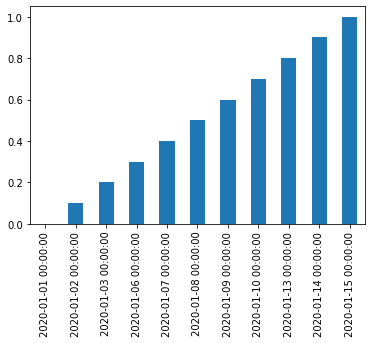

In [35]:
# bar plot
s.plot.bar()

# DATAFRAMES

In [36]:
# let's define a matrix with columns the number from 1 to 10 raised to powers 1, 2, 3, 4, 5
mat = np.array([[i**k for i in range(1,11)] for k in range(1,6)]).T
mat

array([[     1,      1,      1,      1,      1],
       [     2,      4,      8,     16,     32],
       [     3,      9,     27,     81,    243],
       [     4,     16,     64,    256,   1024],
       [     5,     25,    125,    625,   3125],
       [     6,     36,    216,   1296,   7776],
       [     7,     49,    343,   2401,  16807],
       [     8,     64,    512,   4096,  32768],
       [     9,     81,    729,   6561,  59049],
       [    10,    100,   1000,  10000, 100000]])

In [37]:
# a pd.DataFrame from the matrix
df = pd.DataFrame(mat)
df

,0,1,2,3,4
0,1,1,1,1,1
1,2,4,8,16,32
2,3,9,27,81,243
3,4,16,64,256,1024
4,5,25,125,625,3125
5,6,36,216,1296,7776
6,7,49,343,2401,16807
7,8,64,512,4096,32768
8,9,81,729,6561,59049
9,10,100,1000,10000,100000


In [38]:
type(df)

pandas.core.frame.DataFrame

In [39]:
df.size

50

In [40]:
df.shape

(10, 5)

In [41]:
# to retrieve the data-type of the columns use .dtypes (mind the plural)
df.dtypes

0    int32
1    int32
2    int32
3    int32
4    int32
dtype: object

In [42]:
# an additional information: the index (here, the one generated by default)
df.index

RangeIndex(start=0, stop=10, step=1)

In [43]:
# a more descriptive name for the columns
df.columns = ['x', 'x^2', 'x^3', 'x^4', 'x^5']
df

,x,x^2,x^3,x^4,x^5
0,1,1,1,1,1
1,2,4,8,16,32
2,3,9,27,81,243
3,4,16,64,256,1024
4,5,25,125,625,3125
5,6,36,216,1296,7776
6,7,49,343,2401,16807
7,8,64,512,4096,32768
8,9,81,729,6561,59049
9,10,100,1000,10000,100000


In [44]:
df.columns

Index(['x', 'x^2', 'x^3', 'x^4', 'x^5'], dtype='object')

In [45]:
# generation of an index with business-day frequency starting from Jan 1st 2020
dates = pd.date_range('2020-01-01', periods=mat.shape[0], freq='B') 
dates

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14'],
              dtype='datetime64[ns]', freq='B')

In [46]:
df.index = dates
df

,x,x^2,x^3,x^4,x^5
2020-01-01,1,1,1,1,1
2020-01-02,2,4,8,16,32
2020-01-03,3,9,27,81,243
2020-01-06,4,16,64,256,1024
2020-01-07,5,25,125,625,3125
2020-01-08,6,36,216,1296,7776
2020-01-09,7,49,343,2401,16807
2020-01-10,8,64,512,4096,32768
2020-01-13,9,81,729,6561,59049
2020-01-14,10,100,1000,10000,100000


In [47]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14'],
              dtype='datetime64[ns]', freq='B')

In [48]:
# all in all definition
df = pd.DataFrame(data=mat, 
                  index=dates, 
                  columns=['x', 'x^2', 'x^3', 'x^4', 'x^5'])
df

,x,x^2,x^3,x^4,x^5
2020-01-01,1,1,1,1,1
2020-01-02,2,4,8,16,32
2020-01-03,3,9,27,81,243
2020-01-06,4,16,64,256,1024
2020-01-07,5,25,125,625,3125
2020-01-08,6,36,216,1296,7776
2020-01-09,7,49,343,2401,16807
2020-01-10,8,64,512,4096,32768
2020-01-13,9,81,729,6561,59049
2020-01-14,10,100,1000,10000,100000


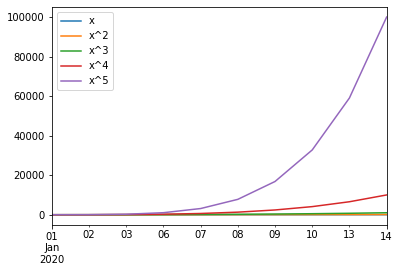

In [49]:
# let's plot it
df.plot()

In [50]:
# let's plot in log-scale
df_log = np.log(df)
df_log.columns = ['log(' + c + ')' for c in df.columns]
df_log

,log(x),log(x^2),log(x^3),log(x^4),log(x^5)
2020-01-01,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-02,0.693147,1.386294,2.079442,2.772589,3.465736
2020-01-03,1.098612,2.197225,3.295837,4.394449,5.493061
2020-01-06,1.386294,2.772589,4.158883,5.545177,6.931472
2020-01-07,1.609438,3.218876,4.828314,6.437752,8.047190
2020-01-08,1.791759,3.583519,5.375278,7.167038,8.958797
2020-01-09,1.945910,3.891820,5.837730,7.783641,9.729551
2020-01-10,2.079442,4.158883,6.238325,8.317766,10.397208
2020-01-13,2.197225,4.394449,6.591674,8.788898,10.986123
2020-01-14,2.302585,4.605170,6.907755,9.210340,11.512925


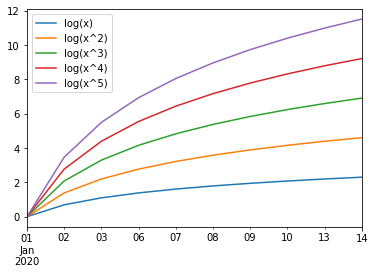

In [51]:
df_log.plot()

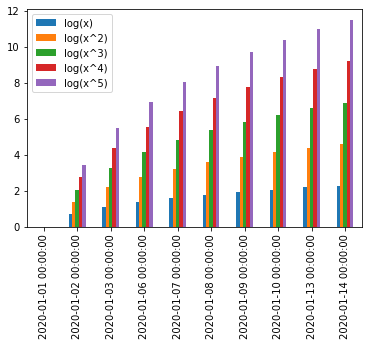

In [52]:
# bar plot
df_log.plot.bar()

In [53]:
df

,x,x^2,x^3,x^4,x^5
2020-01-01,1,1,1,1,1
2020-01-02,2,4,8,16,32
2020-01-03,3,9,27,81,243
2020-01-06,4,16,64,256,1024
2020-01-07,5,25,125,625,3125
2020-01-08,6,36,216,1296,7776
2020-01-09,7,49,343,2401,16807
2020-01-10,8,64,512,4096,32768
2020-01-13,9,81,729,6561,59049
2020-01-14,10,100,1000,10000,100000


In [54]:
# selecting a column 
# (as if the DataFrame was a dict of the column-Series and column labels - e.g. 'x^2' - its keys)
s_x2 = df['x^2']
s_x2

2020-01-01      1
2020-01-02      4
2020-01-03      9
2020-01-06     16
2020-01-07     25
2020-01-08     36
2020-01-09     49
2020-01-10     64
2020-01-13     81
2020-01-14    100
Freq: B, Name: x^2, dtype: int32

In [55]:
# observe that a pd.Series is returned
type(s_x2)

pandas.core.series.Series

In [56]:
# selecting more columns (a pd.DataFrame is returned)
df_x235 = df[['x^2', 'x^3', 'x^5']]
df_x235

,x^2,x^3,x^5
2020-01-01,1,1,1
2020-01-02,4,8,32
2020-01-03,9,27,243
2020-01-06,16,64,1024
2020-01-07,25,125,3125
2020-01-08,36,216,7776
2020-01-09,49,343,16807
2020-01-10,64,512,32768
2020-01-13,81,729,59049
2020-01-14,100,1000,100000


In [57]:
# creating a new column - from a NumPy array
df['2*x^5'] = 2 * mat[:,-1]
df

,x,x^2,x^3,x^4,x^5,2*x^5
2020-01-01,1,1,1,1,1,2
2020-01-02,2,4,8,16,32,64
2020-01-03,3,9,27,81,243,486
2020-01-06,4,16,64,256,1024,2048
2020-01-07,5,25,125,625,3125,6250
2020-01-08,6,36,216,1296,7776,15552
2020-01-09,7,49,343,2401,16807,33614
2020-01-10,8,64,512,4096,32768,65536
2020-01-13,9,81,729,6561,59049,118098
2020-01-14,10,100,1000,10000,100000,200000


In [58]:
# creating a new column - from a single value (note the data-type is not constrained as in NumPy arrays)
df['dummy bool'] = False
df

,x,x^2,x^3,x^4,x^5,2*x^5,dummy bool
2020-01-01,1,1,1,1,1,2,False
2020-01-02,2,4,8,16,32,64,False
2020-01-03,3,9,27,81,243,486,False
2020-01-06,4,16,64,256,1024,2048,False
2020-01-07,5,25,125,625,3125,6250,False
2020-01-08,6,36,216,1296,7776,15552,False
2020-01-09,7,49,343,2401,16807,33614,False
2020-01-10,8,64,512,4096,32768,65536,False
2020-01-13,9,81,729,6561,59049,118098,False
2020-01-14,10,100,1000,10000,100000,200000,False


In [59]:
df.dtypes

x             int32
x^2           int32
x^3           int32
x^4           int32
x^5           int32
2*x^5         int32
dummy bool     bool
dtype: object

In [60]:
# deleting a column
del df['dummy bool']
df

,x,x^2,x^3,x^4,x^5,2*x^5
2020-01-01,1,1,1,1,1,2
2020-01-02,2,4,8,16,32,64
2020-01-03,3,9,27,81,243,486
2020-01-06,4,16,64,256,1024,2048
2020-01-07,5,25,125,625,3125,6250
2020-01-08,6,36,216,1296,7776,15552
2020-01-09,7,49,343,2401,16807,33614
2020-01-10,8,64,512,4096,32768,65536
2020-01-13,9,81,729,6561,59049,118098
2020-01-14,10,100,1000,10000,100000,200000


In [61]:
# creating a new column - as a function of other column(s)
df['log(x^5/x^3)'] = np.log(df['x^5']/df['x^3'])
df

,x,x^2,x^3,x^4,x^5,2*x^5,log(x^5/x^3)
2020-01-01,1,1,1,1,1,2,0.000000
2020-01-02,2,4,8,16,32,64,1.386294
2020-01-03,3,9,27,81,243,486,2.197225
2020-01-06,4,16,64,256,1024,2048,2.772589
2020-01-07,5,25,125,625,3125,6250,3.218876
2020-01-08,6,36,216,1296,7776,15552,3.583519
2020-01-09,7,49,343,2401,16807,33614,3.891820
2020-01-10,8,64,512,4096,32768,65536,4.158883
2020-01-13,9,81,729,6561,59049,118098,4.394449
2020-01-14,10,100,1000,10000,100000,200000,4.605170


In [62]:
# creating a new column - as a logical function of other column(s)
df['5x > x^2'] = 5*df['x'] > df['x^2']
df

,x,x^2,x^3,x^4,x^5,2*x^5,log(x^5/x^3),5x > x^2
2020-01-01,1,1,1,1,1,2,0.000000,True
2020-01-02,2,4,8,16,32,64,1.386294,True
2020-01-03,3,9,27,81,243,486,2.197225,True
2020-01-06,4,16,64,256,1024,2048,2.772589,True
2020-01-07,5,25,125,625,3125,6250,3.218876,False
2020-01-08,6,36,216,1296,7776,15552,3.583519,False
2020-01-09,7,49,343,2401,16807,33614,3.891820,False
2020-01-10,8,64,512,4096,32768,65536,4.158883,False
2020-01-13,9,81,729,6561,59049,118098,4.394449,False
2020-01-14,10,100,1000,10000,100000,200000,4.605170,False


In [63]:
# select rows using a boolean columns
df[df['5x > x^2']]

,x,x^2,x^3,x^4,x^5,2*x^5,log(x^5/x^3),5x > x^2
2020-01-01,1,1,1,1,1,2,0.000000,True
2020-01-02,2,4,8,16,32,64,1.386294,True
2020-01-03,3,9,27,81,243,486,2.197225,True
2020-01-06,4,16,64,256,1024,2048,2.772589,True


In [64]:
# select rows by label - a series indexed by the column labels is returned
df.loc['2020-01-01']

x                  1
x^2                1
x^3                1
x^4                1
x^5                1
2*x^5              2
log(x^5/x^3)       0
5x > x^2        True
Name: 2020-01-01 00:00:00, dtype: object

In [65]:
# select a single element
df.loc['2020-01-01', 'x^2']

1

In [66]:
# slice rows using labels (right label included too!)
df.loc['2020-01-01':'2020-01-03']

,x,x^2,x^3,x^4,x^5,2*x^5,log(x^5/x^3),5x > x^2
2020-01-01,1,1,1,1,1,2,0.000000,True
2020-01-02,2,4,8,16,32,64,1.386294,True
2020-01-03,3,9,27,81,243,486,2.197225,True


In [87]:
# select single element a-la NumPy
df.iloc[0,1]

1

In [88]:
# select rows a-la NumPy
df.iloc[0]

x                  1
x^2                1
x^3                1
x^4                1
x^5                1
2*x^5              2
log(x^5/x^3)       0
5x > x^2        True
Ret x^2          NaN
Name: 2020-01-01 00:00:00, dtype: object

In [68]:
# slice rows a-la NumPy (left index implicitly zero and right index is excluded)
df.iloc[:3]

,x,x^2,x^3,x^4,x^5,2*x^5,log(x^5/x^3),5x > x^2
2020-01-01,1,1,1,1,1,2,0.000000,True
2020-01-02,2,4,8,16,32,64,1.386294,True
2020-01-03,3,9,27,81,243,486,2.197225,True


In [69]:
# computing returns (far vedere steps intermedi)
df['Ret x^2'] = df.iloc[1:]['x'] - df.iloc[:-1]['x']
df

,x,x^2,x^3,x^4,x^5,2*x^5,log(x^5/x^3),5x > x^2,Ret x^2
2020-01-01,1,1,1,1,1,2,0.000000,True,NaN
2020-01-02,2,4,8,16,32,64,1.386294,True,0.0
2020-01-03,3,9,27,81,243,486,2.197225,True,0.0
2020-01-06,4,16,64,256,1024,2048,2.772589,True,0.0
2020-01-07,5,25,125,625,3125,6250,3.218876,False,0.0
2020-01-08,6,36,216,1296,7776,15552,3.583519,False,0.0
2020-01-09,7,49,343,2401,16807,33614,3.891820,False,0.0
2020-01-10,8,64,512,4096,32768,65536,4.158883,False,0.0
2020-01-13,9,81,729,6561,59049,118098,4.394449,False,0.0
2020-01-14,10,100,1000,10000,100000,200000,4.605170,False,NaN


In [72]:
df.sum(axis=0)

x                   55.000000
x^2                385.000000
x^3               3025.000000
x^4              25333.000000
x^5             220825.000000
2*x^5           441650.000000
log(x^5/x^3)        30.208825
5x > x^2             4.000000
Ret x^2              0.000000
dtype: float64

In [77]:
np.log(df[['x', 'x^2', 'x^3', 'x^4', 'x^5']])

,x,x^2,x^3,x^4,x^5
2020-01-01,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-02,0.693147,1.386294,2.079442,2.772589,3.465736
2020-01-03,1.098612,2.197225,3.295837,4.394449,5.493061
2020-01-06,1.386294,2.772589,4.158883,5.545177,6.931472
2020-01-07,1.609438,3.218876,4.828314,6.437752,8.047190
2020-01-08,1.791759,3.583519,5.375278,7.167038,8.958797
2020-01-09,1.945910,3.891820,5.837730,7.783641,9.729551
2020-01-10,2.079442,4.158883,6.238325,8.317766,10.397208
2020-01-13,2.197225,4.394449,6.591674,8.788898,10.986123
2020-01-14,2.302585,4.605170,6.907755,9.210340,11.512925


In [78]:
# alignment is on the union of indexes

In [84]:
df1 = df.loc[:'2020-01-08']
df1

,x,x^2,x^3,x^4,x^5,2*x^5,log(x^5/x^3),5x > x^2,Ret x^2
2020-01-01,1,1,1,1,1,2,0.000000,True,NaN
2020-01-02,2,4,8,16,32,64,1.386294,True,0.0
2020-01-03,3,9,27,81,243,486,2.197225,True,0.0
2020-01-06,4,16,64,256,1024,2048,2.772589,True,0.0
2020-01-07,5,25,125,625,3125,6250,3.218876,False,0.0
2020-01-08,6,36,216,1296,7776,15552,3.583519,False,0.0


In [85]:
df2 = df.loc['2020-01-04':]
df2

,x,x^2,x^3,x^4,x^5,2*x^5,log(x^5/x^3),5x > x^2,Ret x^2
2020-01-06,4,16,64,256,1024,2048,2.772589,True,0.0
2020-01-07,5,25,125,625,3125,6250,3.218876,False,0.0
2020-01-08,6,36,216,1296,7776,15552,3.583519,False,0.0
2020-01-09,7,49,343,2401,16807,33614,3.891820,False,0.0
2020-01-10,8,64,512,4096,32768,65536,4.158883,False,0.0
2020-01-13,9,81,729,6561,59049,118098,4.394449,False,0.0
2020-01-14,10,100,1000,10000,100000,200000,4.605170,False,NaN


In [86]:
df1 + df2

,x,x^2,x^3,x^4,x^5,2*x^5,log(x^5/x^3),5x > x^2,Ret x^2
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,8.0,32.0,128.0,512.0,2048.0,4096.0,5.545177,2,0.0
2020-01-07,10.0,50.0,250.0,1250.0,6250.0,12500.0,6.437752,0,0.0
2020-01-08,12.0,72.0,432.0,2592.0,15552.0,31104.0,7.167038,0,0.0
2020-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
